In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

## Load test image

In [2]:
img = Image.open('./test_img.jpg')

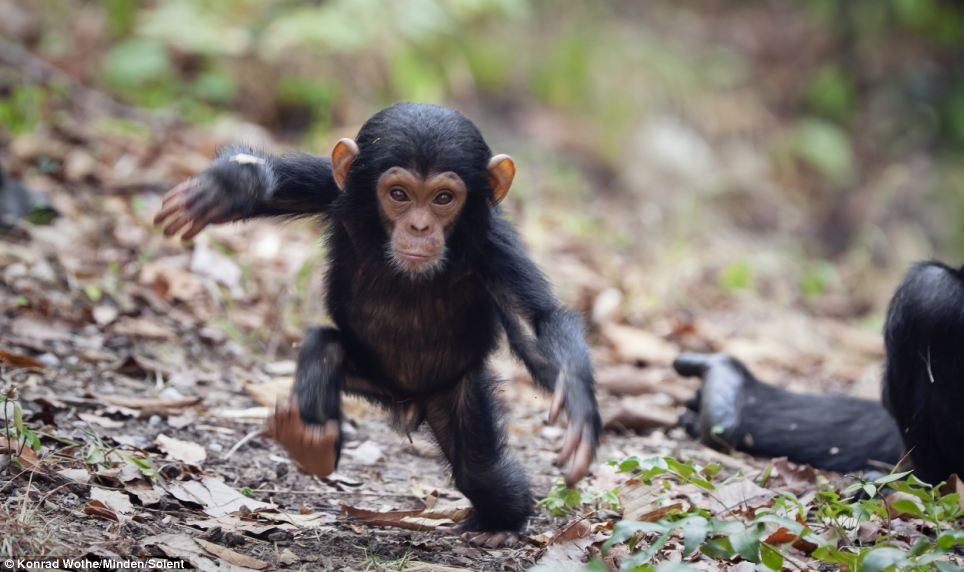

In [3]:
img

## Understand convolution operation

In [4]:
kernel = np.random.random((5, 5)) / 5
# size = 3x3
stride = 1
padding = 1

kernel = np.stack([kernel, kernel, kernel], axis=0)

After these parameters are defined this is all we need for this basic image -> image case where 3 chanels use the same kernel

## Kernel params demo

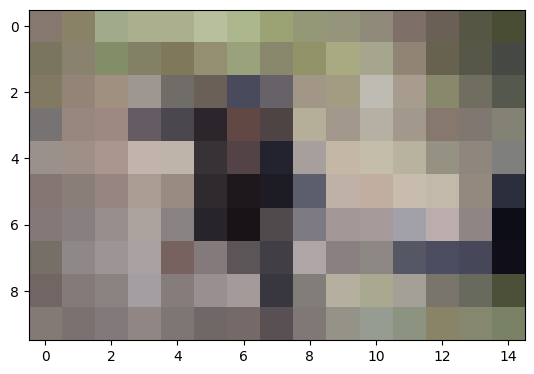

In [5]:
test_kernel_img = img.resize((15, 10))

plt.imshow(test_kernel_img)

In [6]:
def apply_padding(img_array, padding):
    img_ch, img_h, img_w = img_array.shape
    result_template = np.zeros((img_ch, img_h + 2 * padding, 2 * padding + img_w))
    result_template[:, padding:-padding, padding:-padding] = img_array
    return result_template

In [7]:

def apply_kernel(img_array, kernel, stride, padding, visual=False):
    paded_img = apply_padding(img_array, padding)

    image_chanels, image_height, image_width = paded_img.shape

    kernel_chanels, patch_height, patch_width = kernel.shape

    height_iter = range(0, image_height - patch_height + 1, stride)

    width_iter  = range(0, image_width - patch_width + 1, stride)

    if visual:
        counter = 0
        fig, ax = plt.subplots(1,5, figsize=(20, 4))
        fig.suptitle(f"Kernel size {patch_height} x {patch_width}, stride {stride}")
    for h in height_iter:
        for w in width_iter:

            # convolution_result =

            paded_img[:, h:h+patch_height, w:w+patch_height] =

            if visual:
                copy_img = img_array.copy()

                patch = np.zeros((copy_img.shape[0], patch_height, patch_width), dtype=copy_img.dtype)

                patch[0, :, :] = 255

                copy_img[:, h:h + patch_height, w:w + patch_width] = patch

                axis = ax[counter]

                axis.imshow(np.transpose(copy_img, (1, 2, 0)))

                patch_visited = np.zeros((copy_img.shape[0], patch_height, patch_width), dtype=copy_img.dtype)

                patch_visited[1, :, :] = 150

                img_array[:, h:h + patch_height, w:w + patch_width] = patch_visited

                counter += 1
                if counter == 5:
                    plt.show()
                    return


kernel = np.random.random((4, 4)) / 4

kernel = np.stack([kernel], axis=0)

apply_kernel(img_array, kernel, stride, padding, visual=True)

SyntaxError: invalid syntax (2056605863.py, line 19)

In [8]:

configurations = [
    ((3,3), 1),
    ((3,3), 3),
    ((3,3), 5),
    ((5,5), 2)
]

for configuration in configurations:
    show_kernel_move(configuration[0], configuration[1])


NameError: name 'show_kernel_move' is not defined

## Different kernels

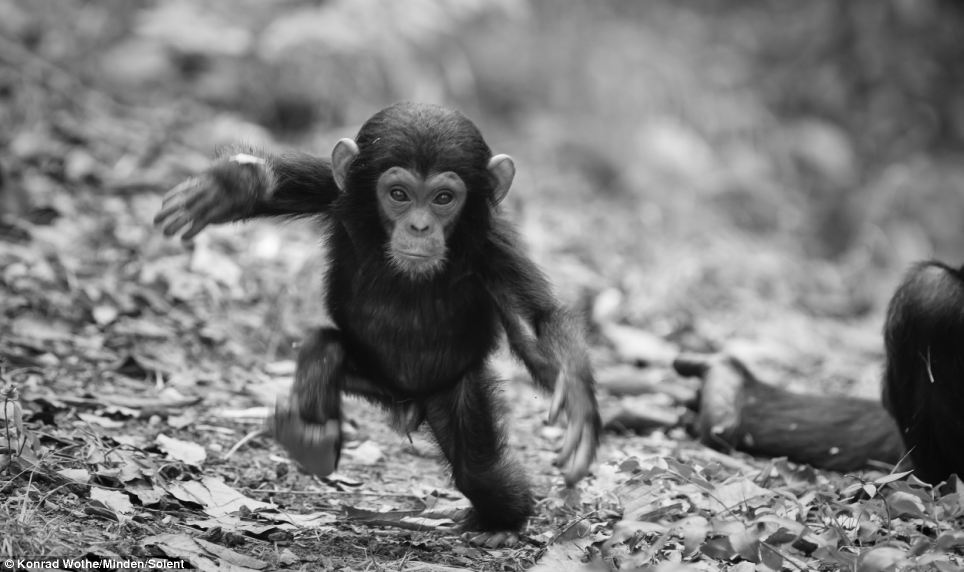

In [93]:
grey_image = img.convert('L')

grey_image

In [ ]:
blur_kernel = np.ones((25, 25))

In [ ]:
class ConvNet:
    def __init__(self):


In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import numpy as np


def l2_regularization(W, reg_strength):
    '''
    Computes L2 regularization loss on weights and its gradient

    Arguments:
      W, np array - weights
      reg_strength - float value

    Returns:
      loss, single value - l2 regularization loss
      gradient, np.array same shape as W - gradient of weight by l2 loss
    '''
    # TODO: Copy from previous assignment
    raise Exception("Not implemented!")

    return loss, grad


def softmax_with_cross_entropy(predictions, target_index):
    '''
    Computes softmax and cross-entropy loss for model predictions,
    including the gradient

    Arguments:
      predictions, np array, shape is either (N) or (batch_size, N) -
        classifier output
      target_index: np array of int, shape is (1) or (batch_size) -
        index of the true class for given sample(s)

    Returns:
      loss, single value - cross-entropy loss
      dprediction, np array same shape as predictions - gradient of predictions by loss value
    '''
    # TODO copy from the previous assignment
    raise Exception("Not implemented!")
    return loss, dprediction


class Param:
    '''
    Trainable parameter of the model
    Captures both parameter value and the gradient
    '''
    def __init__(self, value):
        self.value = value
        self.grad = np.zeros_like(value)


class ReLULayer:
    def __init__(self):
        pass

    def forward(self, X):
        # TODO copy from the previous assignment
        raise Exception("Not implemented!")

    def backward(self, d_out):
        # TODO copy from the previous assignment
        raise Exception("Not implemented!")
        return d_result

    def params(self):
        return {}


class FullyConnectedLayer:
    def __init__(self, n_input, n_output):
        self.W = Param(0.001 * np.random.randn(n_input, n_output))
        self.B = Param(0.001 * np.random.randn(1, n_output))
        self.X = None

    def forward(self, X):
        # TODO copy from the previous assignment
        raise Exception("Not implemented!")

    def backward(self, d_out):
        # TODO copy from the previous assignment

        raise Exception("Not implemented!")
        return d_input

    def params(self):
        return { 'W': self.W, 'B': self.B }


class ConvolutionalLayer:
    def __init__(self, in_channels, out_channels,
                 filter_size, padding):
        '''
        Initializes the layer

        Arguments:
        in_channels, int - number of input channels
        out_channels, int - number of output channels
        filter_size, int - size of the conv filter
        padding, int - number of 'pixels' to pad on each side
        '''

        self.filter_size = filter_size
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.W = Param(
            np.random.randn(filter_size, filter_size,
                            in_channels, out_channels)
        )

        self.B = Param(np.zeros(out_channels))

        self.padding = padding

        self.last_X = None


    def forward(self, X):
        batch_size, height, width, channels = X.shape


        out_height = height - self.filter_size + 1 + 2 * self.padding
        out_width = width - self.filter_size + 1 + 2 * self.padding

        if self.padding > 0:
            padded_template = np.zeros((batch_size, height+2*self.padding, width+2*self.padding, channels), dtype=X.dtype)
            padded_template[:, self.padding:-self.padding, self.padding:-self.padding, :] = X
            X = padded_template

        self.last_X = X

        # TODO: Implement forward pass
        result = np.zeros((batch_size, out_height, out_width, self.out_channels))
        # and one x/y location at a time in the loop below

        # It's ok to use loops for going over width and height
        # but try to avoid having any other loops

        weights = self.W.value.reshape(self.in_channels * self.filter_size * self.filter_size, self.out_channels)

        for y in range(out_height):
            for x in range(out_width):
                patch = X[:, y:y + self.filter_size, x:x+self.filter_size, :]

                input = patch.reshape((batch_size, self.filter_size * self.filter_size * self.in_channels))

                res = input @ weights

                res += self.B.value

                result[:, y , x, : ] = res

        return result


    def backward(self, d_out):
        # Hint: Forward pass was reduced to matrix multiply
        # You already know how to backprop through that
        # when you implemented FullyConnectedLayer
        # Just do it the same number of times and accumulate gradients

        batch_size, height, width, in_channels = self.last_X.shape

        _, out_height, out_width, out_channels = d_out.shape

        # TODO: Implement backward pass

        result = np.zeros_like(self.last_X)

        # Same as forward, setup variables of the right shape that
        # aggregate input gradient and fill them for every location
        # of the output

        # Try to avoid having any other loops here too

        weights = self.W.value.reshape(self.in_channels * self.filter_size * self.filter_size, self.out_channels)
        # (in_chanels*filter*filter x out_chanels)

        for y in range(out_height):
            for x in range(out_width):
                d_out_patch = d_out[:, y, x, :]
                # (num_batches x out_chanels)

                last_x_patch = self.last_X[:, y:y + self.filter_size, x:x+self.filter_size, :].reshape((batch_size, self.filter_size * self.filter_size * in_channels))
                # (num_batches X filter*filter*in_chanels*out_chanels)

                dw = last_x_patch.T @ d_out_patch

                db = np.sum(d_out_patch, axis=(0))

                d_input_patch = d_out_patch @ weights.T

                d_input_original = d_input_patch.reshape((batch_size, self.filter_size, self.filter_size, self.in_channels))

                result[:, y:y + self.filter_size, x:x+self.filter_size, :] += d_input_original

                dw_original = dw.reshape(self.filter_size, self.filter_size, self.in_channels, self.out_channels)

                self.W.grad += dw_original

                self.B.grad += db


        return result[:, self.padding:-self.padding, self.padding:-self.padding, :] if self.padding > 0 else result


    def params(self):
        return { 'W': self.W, 'B': self.B }


class MaxPoolingLayer:
    def __init__(self, pool_size, stride):
        '''
        Initializes the max pool

        Arguments:
        pool_size, int - area to pool
        stride, int - step size between pooling windows
        '''
        self.pool_size = pool_size
        self.stride = stride
        self.X = None

    def forward(self, X):
        batch_size, height, width, channels = X.shape

        self.X = X

        out_height = (height - self.pool_size) // self.stride + 1
        out_width = (width - self.pool_size) // self.stride + 1

        result = np.zeros((batch_size, out_height, out_width, channels))

        for y in range(out_height):
            for x in range(out_width):
                patch = X[:, y * self.stride:y * self.stride +self.pool_size, x * self.stride:x * self.stride +self.pool_size, :]

                res = np.max(patch, axis=(1, 2))

                result[:, y, x, :] = res

        return result



    def backward(self, d_out):
        # shape d_out (bacthes, out_h, out_w, chanels)

        batch_size, out_height, out_width, channels = d_out.shape

        batch_size, height, width, channels = self.X.shape

        d_input = np.zeros_like(self.X)

        for y in range(out_height):
            for x in range(out_width):
                input_patch = self.X[:, y * self.stride:y * self.stride + self.pool_size, x * self.stride:x * self.stride +self.pool_size, :]

                input_patch_reshaped = input_patch.reshape(batch_size, -1 , channels)

                max_idx_local = np.argmax(input_patch_reshaped, axis=1)

                row_idx_local, col_idx_local = np.unravel_index(max_idx_local, (self.pool_size, self.pool_size))

                row_idx_global = row_idx_local + y * self.stride
                col_idx_global = col_idx_local + x * self.stride

                batch_idx = np.arange(batch_size)[:, None]
                channel_idx = np.arange(channels)

                d_input[batch_idx, row_idx_global, col_idx_global, channel_idx] += d_out[:, y, x, :]

        return d_input

    def params(self):
        return {}


class Flattener:
    def __init__(self):
        self.X_shape = None

    def forward(self, X):
        batch_size, height, width, channels = X.shape

        # TODO: Implement forward pass
        # Layer should return array with dimensions
        # [batch_size, hight*width*channels]
        raise Exception("Not implemented!")

    def backward(self, d_out):
        # TODO: Implement backward pass
        raise Exception("Not implemented!")

    def params(self):
        # No params!
        return {}
